# ME4 Machine Learning - Tutorial 6

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

## 1. 1D function fitting

### 1.1. Create a 1D piecewise function

In [2]:
x = np.linspace(0, 1, 200)

y = x.copy()
y[x < 0.1] = 0 # y = 0 for x < 0.1
y[x >= 0.1] = 0.5*(x[x >= 0.1]-0.1) # add a gradient of +0.5 if x >= 0.5
y[x >= 0.6] = 0.25-0.25/0.2*(x[x >= 0.6]-0.6) 
# ^ gradient downwards from 0.6 to 0.8 (gradient 
# calculated so that line goes from 
# (0.6, 0.25) -> (0.8, 0), i.e. joins up with the other segments)
y[x > 0.8] = 0 #y = 0 for x > 0.8

### 1.2. Use Keras to fit the function

In [3]:
# set up a sequential neural network
model = Sequential()
#add a layer of 3 nodes of ReLUs, taking a single parametric input
model.add(Dense(units=3, activation='relu', input_dim=1))
#add a linear node at the end to combine the nodes together
model.add(Dense(units=1, activation='linear'))

compile the model, trying to minimise mean squared 

In [4]:
# error (error metric) and using the Adam algorithm (gradient decent method) to fit this
model.compile(loss="mean_squared_error",
              optimizer='adam')

fit the data provided previously, using 1000 epochs and a batch size of 32

In [5]:
model.fit(x, y, epochs=1000, batch_size=32)

#obtain a predicted set of values from the fitted function along its length
y_pred = model.predict(x)

Epoch 1/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 2/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 3/1000
7/7 [==============================] - 0s 917us/step - loss: 0.0120
Epoch 4/1000
7/7 [==============================] - 0s 834us/step - loss: 0.0111
Epoch 5/1000
7/7 [==============================] - 0s 917us/step - loss: 0.0104
Epoch 6/1000
7/7 [==============================] - 0s 918us/step - loss: 0.0097
Epoch 7/1000
7/7 [==============================] - 0s 834us/step - loss: 0.0091
Epoch 8/1000
7/7 [==============================] - 0s 917us/step - loss: 0.0086
Epoch 9/1000
7/7 [==============================] - 0s 751us/step - loss: 0.0083
Epoch 10/1000
7/7 [==============================] - 0s 834us/step - loss: 0.0079
Epoch 11/1000
7/7 [==============================] - 0s 918us/step - loss: 0.0077
Epoch 12/1000
7/7 [==============================] - 0s 751us/step - loss: 0.0075
Epoch 13/1000
7/7 [==========

Plot predicted values to the true functions. 

(Should see that the fitting has not worked well)

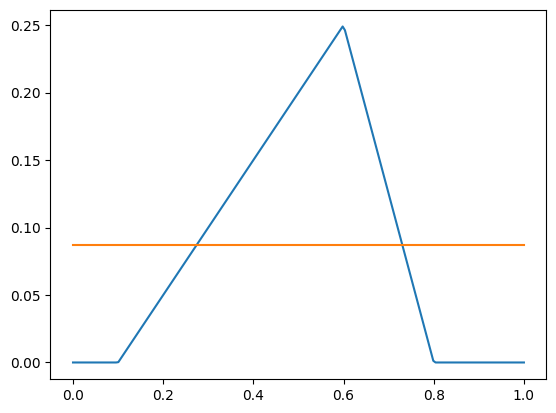

In [6]:
fig, ax = plt.subplots()

ax.plot(x, y, label='original')
ax.plot(x, y_pred, label='predicted 1')

### 1.3. Manually set the weights to generate the correct output.

Weights of a layer are of the shape `(n_input_nodes x n_layer_nodes)` and biases are of the shape `(n_layer_nodes,)`

In [7]:
# Modify first layer weights (first array) and biases (second array)
model.layers[0].set_weights([np.array([[0.5, -(-0.5-0.25/0.2), 0.25/0.2]],), np.array([-0.5*0.1, (-0.5-0.25/0.2)*0.6, -(0.25/0.2)*0.8],)]) 
# Modify second layer weights (first array) and biases (second array)
model.layers[1].set_weights([np.array([[1],[-1],[1]],), np.array([0],)])

In [8]:
y_pred2 = model.predict(x)

7/7 [==============================] - 0s 834us/step


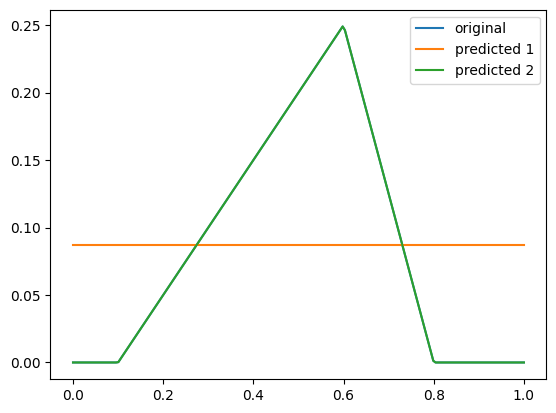

In [9]:
ax.plot(x, y_pred2, label='predicted 2')
ax.legend()
fig

### 1.4 Add multiple layers.

Set the first hidden layer to 10 nodes (from 150 before), then add two more layers of 10 nodes, all with ReLUs.

In [10]:
model = Sequential()

model.add(Dense(units=10, activation='relu', input_dim=1))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [11]:
model.compile(loss="mean_squared_error",
              optimizer='adam')

model.fit(x, y, epochs=1000, batch_size=32)

#obtain a predicted set of values from the fitted function along its length
y_pred3 = model.predict(x)

Epoch 1/1000
7/7 [==============================] - 0s 918us/step - loss: 0.0084
Epoch 2/1000
7/7 [==============================] - 0s 917us/step - loss: 0.0078
Epoch 3/1000
7/7 [==============================] - 0s 917us/step - loss: 0.0074
Epoch 4/1000
7/7 [==============================] - 0s 917us/step - loss: 0.0067
Epoch 5/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 6/1000
7/7 [==============================] - 0s 917us/step - loss: 0.0059
Epoch 7/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 8/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 9/1000
7/7 [==============================] - 0s 917us/step - loss: 0.0048
Epoch 10/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 11/1000
7/7 [==============================] - 0s 917us/step - loss: 0.0041
Epoch 12/1000
7/7 [==============================] - 0s 917us/step - loss: 0.0038
Epoch 13/1000
7/7 [==============

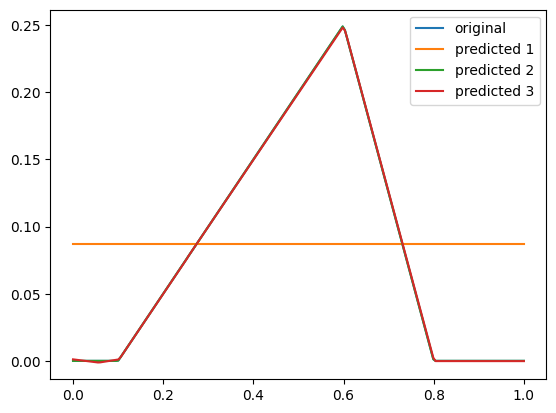

In [12]:
ax.plot(x, y_pred3, label='predicted 3')
ax.legend()
fig

In [13]:
model = Sequential()

model.add(Dense(units=10, activation='tanh', input_dim=1))
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=1, activation='linear'))

In [14]:
model.compile(loss="mean_squared_error",
              optimizer='adam')

model.fit(x, y, epochs=1000, batch_size=32)

#obtain a predicted set of values from the fitted function along its length
y_pred4 = model.predict(x)

Epoch 1/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0312
Epoch 2/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 3/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 6/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 7/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 8/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 9/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 10/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 11/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 12/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 13/1000
7/7 [==============================

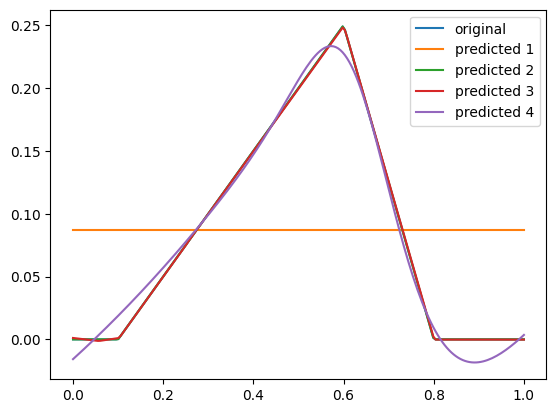

In [15]:
ax.plot(x, y_pred4, label='predicted 4')
ax.legend()
fig